# API-201 ABC REVIEW SESSION #7

**Friday, October 28**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap <a class="anchor" id="Lecture-Recap"></a>

## Confidence intervals

Suppose there is some mean ***$\mu$*** that we want to measure. We usually don't have access to information for all the population, so we estimate ***$\mu$*** by computing the mean ***$\hat{\mu}$*** in a random sample. 

The sample mean ***$\hat{\mu}$*** is random, as it may produce a different estimate if we apply it to a different sample. The **sampling distribution** is the distribution of the sample mean ***$\hat{\mu}$***. In other words, it is a probability distribution formed by the estimates we obtain from calculating the mean for different samples from the population of interest.

The sample mean ***$\hat{\mu}$*** is a random variable, so it has an expected value and a standard deviation. The **Central Limit Theorem** states that for a large enough sample (n > 30), the distribution of ***$\hat{\mu}$*** is approximately normal:
\begin{align*}
N(\mu,\frac{\sigma}{\sqrt{n}})
\end{align*}

The sampling distribution allows us to construct a **95% confidence interval around our point estimate**. 95% of all possible confidence intervals will contain the true value of the population parameter. 

If the sampling distribution is normal, then we can construct a 95% confidence interval around ***$\hat{\mu}$*** by using the mean and standard deviation of ***$\hat{\mu}$***. However, given that we don't know ***$\mu$***, we use both the sample proportion and the estimated standard error instead, such that: 
\begin{align*}
CI = \hat{\mu} \pm 2 SD(\hat{\mu})
\end{align*}

where:
\begin{align*}
SD(\hat{\mu}) = \frac{\hat{\sigma}}{\sqrt{n}}
\end{align*}

## Constructing confidence intervals

Recall that an **estimate** is our best guess of the true value of the population parameter. There are multiple types of parameters that we could be interested in estimating. For example:
1. Proportion: Proportion of vaccinated people that got Covid.
2. Mean: Average consumption for people that had access to a microfinance program in India.
3. Difference in proportions: Difference in Covid infection rates between those who got vaccinated and those who didn’t.
4. Difference in means: Difference in average consumption between treatment
and control groups of a microfinance program in India.

We can use the sampling distribution of our estimator to tell us how confident we are in our estimate. The table below contains the information we need to construct a confidence interval for each of these parameters:

|  Population parameter | Sample parameter | Mean of sampling distribution | Standard deviation of sampling distribution
| --- | --- | --- | --- 
| p | $\hat{p}$  |  $E(\hat{p})= p$ | $\sqrt{\frac{p(1-p)}{n}}$
| $\mu$ | $\hat{\mu}$ |  $E(\hat{\mu})= \mu$ | $\frac{\sigma}{\sqrt{n}}$
| $p_1 - p_2$ | $\hat{p_1} - \hat{p_2}$ |  $E(\hat{p_1} - \hat{p_2})= p_1 - p_2$  | $\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$
| $\mu_1 - \mu_2$ | $\hat{\mu_1} - \hat{\mu_2}$ |  $E(\hat{\mu_1} - \hat{\mu_2})= \mu_1 - \mu_2$  | $\sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}}$

For example, if we wanted to estimate the difference in proportions, the 95% confidence interval has the same form as before:
\begin{align*}
CI = \hat{p_1} - \hat{p_2} \pm 2 SD(\hat{p_1} - \hat{p_2})
\end{align*}

Plugging in the standard deviation of the difference in proportions, we get:

\begin{align*}
CI = \hat{p_1} - \hat{p_2} \pm 2 \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}
\end{align*}

## Statistical significance

**Hypothesis testing** consists in posing a hypothesis concerning the value of a population parameter, drawing a sample from the population, and then
assessing the estimate with respect to the hypothesis posed. The observed value is **statistically significant** if it is unlikely under the null hypothesis. In other words, it doesn’t fall within the middle 95% of the null sampling distribution.

An estimate is statistically significant if it is at least two standard deviations away from the null hypothesis. The confidence interval consists of those points within two standard deviations of the estimate. So an estimate is statistically significant if its confidence interval does not contain the null hypothesis. Typically, the null hypothesis is 0, meaning an estimate is statistically significant if its confidence interval does not
contain 0.

The **p-vaue** is the probability of obtaining an estimate as extreme or more extreme than the one we obtained assuming our null hypothesis is true. A result is statistically significant if the p-value is less than 0.05. In other words, if the null hypothesis were true, we are unlikely to have obtained our result. 

We compute p-values using z-scores. The z-score tells us how many standard deviations our estimate is from the null hypothesis:
\begin{align*}
z = \frac{x-\mu_0}{s}
\end{align*}

where $\mu_0$ is the null hypothesis and $s$ is the standard error.

We convert z-scores to p-values with the **pnorm** function in R. For any number z, pnorm(z) returns the probability that the normal random variable is less than z standard deviations below its mean. In order to get both of the "tails" on the extremes of our estimate, we need to make sure we use a negative Z-score and double the value to account for both tails. So if our z-score is z, we can calculate the p-value as $2*pnorm(-abs(z))$.

## Calculating p-values in R

Suppose that we were testing whether the microfinance has an effect on consumption. The null hypothesis is that the difference in means is equal to 0, and the null sampling distribution is plotted below. If you find a z-score equal to 2, what is the p-value associated with that z-score? Is your estimate of the difference in means significant?

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



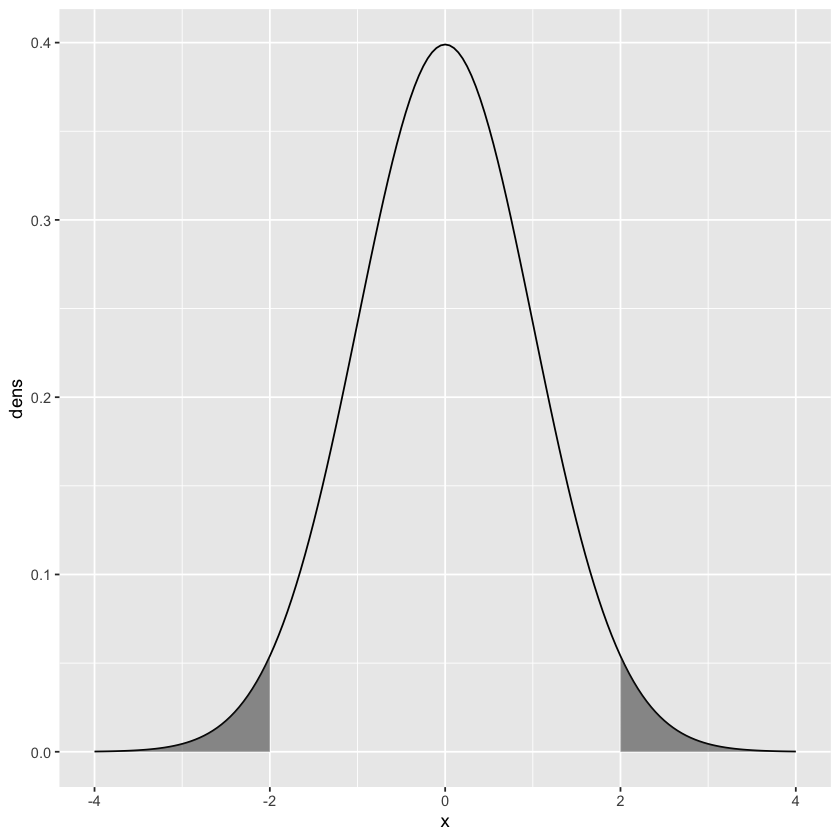

In [2]:
# Plot a standard normal distribution
library(tidyverse)
data <- tibble(x = seq(-4, 4, .05), dens = dnorm(x))
ggplot(data, aes(x = x, y = dens)) + 
    geom_line() +
    geom_area(data = filter(data, x <= -2 ), alpha = .5) +
    geom_area(data = filter(data, x >= 2 ), alpha = .5) 

In [3]:
# Pnorm
2*pnorm(-abs(2))

[1] 0.04550026

# Exercise: Project STAR Part 2<a class="anchor" id="Exercises"></a>

**From last week:** The Project STAR (for Student-Teacher Achievement Ratio) was designed to determine the effect of smaller class size in the earliest grades on short-term and long-term pupil performance ([source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766)). Over 7,000 students in 79 schools across the state of Tennessee were randomly assigned into one of three interventions: small class (13 to 17 students per teacher), regular class (22 to 25 students per teacher), and regular-with-aide class (22 to 25 students with a full-time teacher's aide). Classroom teachers were also randomly assigned to the classes they would teach. The interventions were initiated as the students entered school in kindergarten and continued through third grade. 



In this exercise, we are going to use data from Project STAR to assess whether there is a statistically significant impact of class sizes on learn about the pupils involved in the project through visualization and measure the association between classroom size and student achievement.

Unlike last class, the data has been aggregated at the teacher level so that scores are averages across all students taught by that teacher. 

[Download the data using this link.](https://github.com/5harad/API201-students/raw/main/review_sessions/review_7/STAR_teachers.xlsx)

## Data Dictionary
* `gktchid`: kindergarten teacher ID
* `gkclasstype`: kindergarten class type; S - Small, R - Regular/Large
* `gktreadss`: average kindergarten reading score
* `gktmathss`: average kindergarten math score
* `hsactmath`: average high school ACT math score
* `hsactread`: average high school ACT reading score

**1. Upload the Excel file `STAR_teachers.xlsx` to Google Colab and use `read_excel` to read its first worksheet as a new table called `star_teachers`. Examine the first 10 rows of the data.**

In [86]:
library(tidyverse)
library(readxl)

# Your answer here!

# START
star_teachers <- read_excel(path = "STAR_teachers.xlsx", sheet = 1)
head(star_data, 10)
# END  

gktchid,gkclasstype,gktreadss,gktmathss,hsactread,hsactmath
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
11203801,S,406.500,448.5000,18.50000,19.50000
11203802,R,410.000,454.0000,25.00000,20.00000
11203803,R,410.200,479.4000,19.40000,20.60000
12305601,R,437.875,477.8750,23.12500,19.75000
12305602,S,418.500,472.7500,19.50000,19.50000
12305603,R,429.500,480.0000,19.70000,16.50000
12806801,S,454.000,503.3333,26.33333,22.66667
12806802,R,444.500,492.7500,22.50000,19.75000
12806803,R,444.400,513.4000,22.40000,20.00000


**2. Calculate the number of teachers and the mean and variance of reading score by class type. Which class type has a higher average reading score? Which class type has greater variance in reading score?** 


In [15]:
# Your answer here!

# START
star_teachers %>%
    group_by(gkclasstype) %>%
    summarize(n = n(),
              mean = mean(gktreadss),
              var = var(gktreadss))
# END

gkclasstype,n,mean,var
<chr>,<int>,<dbl>,<dbl>
R,196,445.8346,362.3407
S,126,451.6607,548.6109


**3. Suppose $\hat\mu_R$ is the sample mean of the reading score in regular classes and $\hat\mu_S$ is the sample mean in small classes. Using your results from (2), calculate the difference in sample means and the standard error of $\hat\mu_S - \hat\mu_R$.**

Recall that $SE(\hat\mu_S - \hat\mu_R) = \sqrt{\frac{\hat\sigma_S^2}{n_S} + \frac{\hat\sigma_R^2}{n_R}}$ where $\hat\sigma_S^2$ and $\hat\sigma_R^2$ are the sample variances and $n_S$ and $n_R$ are the sample sizes.

In [36]:
# Your answer here!

# START
diff <- 451.7 - 445.8
se <- sqrt(548.6 / 126 + 362.3 / 196)
c("Difference in Means" = diff, "Standard error" = se)
# END

Difference in Means      Standard error 
           5.900000            2.490469

**4. What is the 95% confidence interval of $\mu_S - \mu_R$?**

In [63]:
# Your answer here!

# START
c("Lower Bound" = diff - 2 * se, 
  "Upper Bound" = diff + 2 * se)
# END

Lower Bound Upper Bound 
  0.9190613  10.8809387

**5. What is the Z-score corresponding to the null hypothesis $\mu_S - \mu_R = 0$?**

In [87]:
# Your answer here!

# START
z <- (diff - 0) / se
c("Z-score" = z)
# END

Z-score 
2.369031

**6. What is the p-value corresponding to the Z-score? Is the difference in means statistically significant?**

In [85]:
# Your answer here!

# START
p <- 2 * pnorm(-abs(z))
c("p-value" = p)
c("Reject null hypothesis?" = p < .05)
# END

p-value 
0.01783474

Reject null hypothesis? 
                   TRUE